# Analysis of Mouse Brain Spatial Data

In [1]:
import stt as st
import scanpy as sc
import anndata
import scvelo as scv
import gseapy as gp
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib as mpl
from adjustText import adjust_text

The processed data could be download [here](https://drive.google.com/file/d/1c53v1xo0wPd_2O7Zkfz1SWYsrv6e5bUC/view?usp=drive_link)

In [2]:
data_dir = '../data/'
adata = sc.read_h5ad(data_dir+'mousebrain_bin60_clustered.h5ad')

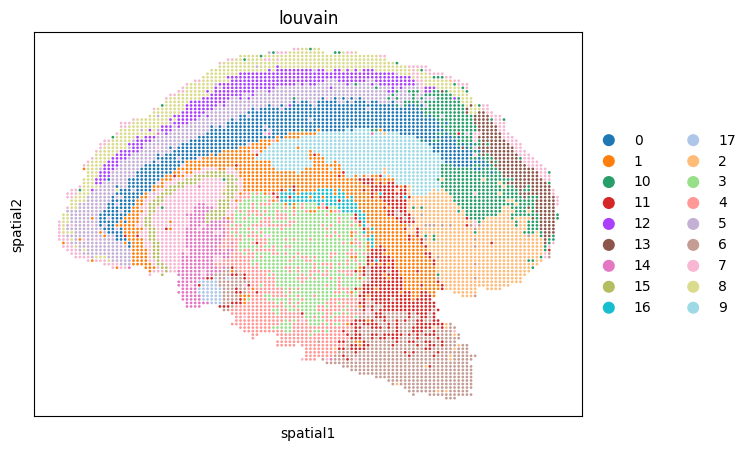

In [3]:
sc.pl.scatter(adata, basis='spatial', color='louvain')

In [4]:
adata.obs['louvain'].value_counts()

0     729
1     713
2     612
3     604
4     598
5     591
6     576
7     507
8     472
9     464
10    453
11    431
12    340
13    219
14    216
15    117
16     87
17     36
Name: louvain, dtype: int64

In [11]:
%pip install sckit-misc -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [5]:
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=2000)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

ImportError: Please install skmisc package via `pip install --user scikit-misc

In [5]:
scv.pp.moments(adata)

Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
adata.obs['attractor']= adata.obs['louvain'].values

adata_aggr = st.tl.dynamical_iteration(adata,n_states =5, n_iter = 15, return_aggr_obj=True, weight_connectivities = 0.5,n_components = 21, n_neighbors = 100,thresh_ms_gene = 0.2, use_spatial = True,spa_weight = 0.3, thresh_entropy = 0.05)    

sc.pl.embedding(adata, basis="spatial", color="attractor")

  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.19, mode=deterministic, seed=57381, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.046166
0.25    1.174451
0.50    1.305728
0.75    1.379518
1.00    1.583753
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.32, mode=deterministic, seed=55466, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000023
0.25    0.032062
0.50    0.069227
0.75    0.135519
1.00    8.346438
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000030
0.25    0.042152
0.50    0.089262
0.75    0.162167
1.00    0.786642
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket


  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.34, mode=deterministic, seed=13526, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000005
0.25    0.043578
0.50    0.087912
0.75    0.152173
1.00    5.097678
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000007
0.25    0.055612
0.50    0.114057
0.75    0.193429
1.00    1.007612
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.35, mode=deterministic, seed=17239, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000114
0.25    0.063557
0.50    0.114363
0.75    0.165599
1.00    0.420111
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000141
0.25    0.080651
0.50    0.143556
0.75    0.201027
1.00    0.488603
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: 

  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------


((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.35, mode=deterministic, seed=43845, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000018
0.25    0.068249
0.50    0.131410
0.75    0.217674
1.00    0.662758
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000024
0.25    0.089627
0.50    0.170195
0.75    0.263101
1.00    0.586382
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket


  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.35, mode=deterministic, seed=31340, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000004
0.25    0.070380
0.50    0.108309
0.75    0.157201
1.00    0.457801
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000006
0.25    0.085497
0.50    0.134783
0.75    0.206556
1.00    0.584876
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.34, mode=deterministic, seed=2010, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000028
0.25    0.040984
0.50    0.093291
0.75    0.184582
1.00    0.613134
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000035
0.25    0.047871
0.50    0.109773
0.75    0.209718
1.00    0.466027
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.35, mode=deterministic, seed=59633, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000019
0.25    0.035776
0.50    0.078933
0.75    0.145098
1.00    0.373187
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000024
0.25    0.043337
0.50    0.098129
0.75    0.192627
1.00    0.416914
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: 

  0%|          | 0/7765 [00:00<?, ?cell/s]

[0]PETSC ERROR: 

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.34, mode=deterministic, seed=42411, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000064
0.25    0.034823
0.50    0.080836
0.75    0.163026
1.00    0.619511
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000082
0.25    0.041112
0.50    0.096104
0.75    0.187500
1.00    0.433308
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.35, mode=deterministic, seed=10465, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))

Quantiles for entropy relative difference with last iteration:
0.00    0.000036
0.25    0.034531
0.50    0.071203
0.75    0.164663
1.00    0.626937
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000051
0.25    0.046163
0.50    0.090944
0.75    0.193899
1.00    0.504721
dtype: float64

Quantiles for entropy absolute difference with last iteration:


  0%|          | 0/7765 [00:00<?, ?cell/s]

  0%|          | 0/7765 [00:00<?, ?cell/s]

((0.7 * ((0.5 * <VelocityKernel[softmax_scale=0.35, mode=deterministic, seed=26385, scheme=<DotProductScheme>]>) + (0.5 * <ConnectivityKernel[dnorm=True, key=connectivities]>))) + (0.3 * <ConnectivityKernel[dnorm=True, key=spatial_connectivities]>))


In [ ]:
st.pl.plot_top_genes(adata, top_genes = 100, ncols =8, wspace = 1, hspace = 1, figsize = (12,20))

In [ ]:
st.pl.plot_genes_list(adata, genelist = ['Rgs9'], figsize =(10,10) ,ncols =1, wspace = 0.9, hspace = 1)
#plt.savefig('./figures/emt_genes.pdf',dpi = 800,bbox_inches = 'tight')

In [ ]:
sc.set_figure_params(dpi=600,fontsize = 12)
mpl.rcParams['axes.grid'] = False
adata.obsm['X_xy_loc'] = adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
adata.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']

st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [0,1,2],filter_cells = True, member_thresh = 0.1)

In [ ]:

st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [6,7],filter_cells = True, member_thresh = 0.1)

In [ ]:
sc.set_figure_params(dpi=600,fontsize = 12)
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 2,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 1,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 1,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 2,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'spliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'unspliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
sc.pl.violin(adata, keys = ['entropy'], groupby='attractor')

In [ ]:
st.construct_landscape(adata, coord_key = 'xy_loc')

In [ ]:
sc.set_figure_params(dpi=600,figsize = (6,6) ,fontsize = 10)
st.infer_lineage(adata,si=0,sf=2, method = 'MPPT',flux_fraction=0.6)

In [ ]:
%matplotlib inline
sc.set_figure_params(dpi=600,figsize = (4,4) ,fontsize = 10)
st.plot_landscape(adata, dim = 3, elev=57, azim = 167,size_point = 8)

In [ ]:
ms_genes = adata.uns['gene_subset']
adata.uns['gene_subset'] = [x for x in ms_genes if x.startswith('Wnt')]
adata_aggr.uns['gene_subset'] = [x for x in ms_genes if x.startswith('Wnt')]

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

## Pathway Analysis

In [ ]:
pathway = gp.parser.download_library(name = 'KEGG_2019_Mouse')

In [ ]:
tpm_dict = {}
pathway_select = {}
temp = []
for key in pathway.keys():
    gene_list = [x.capitalize() for x in pathway[key]] 
    gene_select = [x for x in gene_list if x in adata_aggr.var_names]
    if len(gene_select)>2 and gene_select not in temp:
            scv.tl.velocity_graph(adata, vkey = 'vj', xkey = 'Ms', gene_subset = gene_select ,n_jobs = -1)
            tpm_dict[key] = adata.uns['vj_graph'].toarray().reshape(-1)
            pathway_select[key] = gene_select
            temp.append(gene_select)

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a pandas DataFrame from the dictionary
arr = np.stack(list(tpm_dict.values()))
cor = np.corrcoef(arr)

In [ ]:
pca = PCA(n_components=10)
pca_embedding = pca.fit_transform(cor)

# Perform UMAP on the PCA embedding
umap_reducer = umap.UMAP()
umap_embedding = umap_reducer.fit_transform(pca_embedding)

In [ ]:
# Perform hierarchical clustering
linked = linkage(cor, method='ward')

# Define the distance threshold or desired number of clusters
# Here, we'll use a distance threshold of 1.5
threshold = 1.5

# Get clustering labels as a NumPy array
c_labels = fcluster(linked, threshold, criterion='distance')

In [ ]:

# Sample data
x = umap_embedding[:, 0]
y = umap_embedding[:, 1]
labels = tpm_dict.keys()

# Create the scatter plot
fig, ax = plt.subplots()

num_clusters = max(c_labels)
cmap = plt.cm.get_cmap('Set2', num_clusters)

# Map the labels to colors using the colormap
colors = cmap((c_labels - 1) / (num_clusters - 1))

# Plot the scatter plot with colors based on the labels
sc = plt.scatter(x, y, c=colors)

# Remove the square outline
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)


arrow_properties = dict(
    arrowstyle='->',  # Simple arrow with a head
    color='red',      # Arrow color
    linewidth=0.5,    # Arrow line width
    alpha=0.8,         # Arrow transparency     
    mutation_scale=5 
)
# Annotate points with labels
texts = []
for i, txt in enumerate(labels):
    texts.append(ax.annotate(txt, (x[i], y[i]), fontsize=8))
    
# Adjust the annotation positions to avoid overlaps
adjust_text(texts,arrowprops=arrow_properties)

# Hide axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Hide axis labels (tick labels)
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')

# Display the plot
plt.show()


In [ ]:
subset = pathway_select['TGF-beta signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Wnt signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['MAPK signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Hippo signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')